In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
data = pd.read_csv('robosheet2.csv')

In [51]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [52]:
data.shape

(145460, 23)

In [53]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

lots of non numeric columns and also lot of missing values 

In [55]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'RainToday']
target = ['RainTomorrow']

# Separate features and target variable
X = data[features]
Y = data[target]

In [56]:
X.shape

(145460, 9)

In [57]:
Y.shape

(145460, 1)

to split data into training and testing setss

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

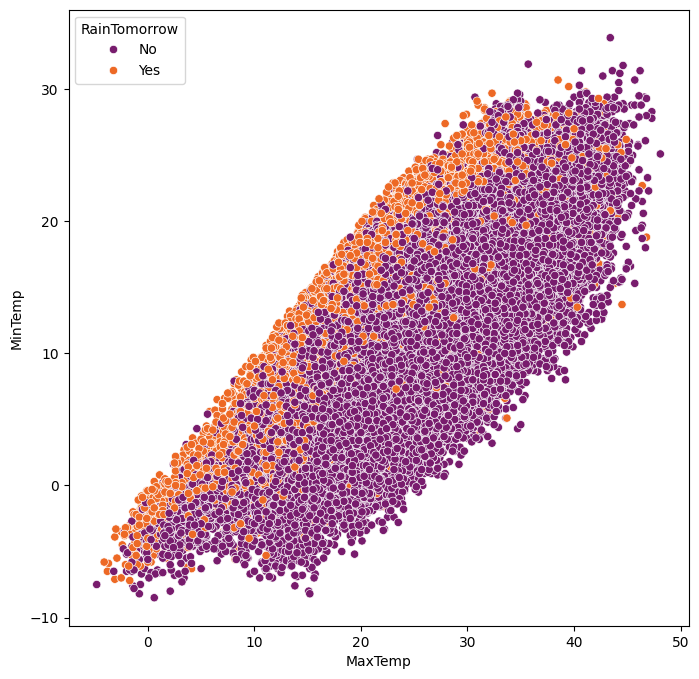

In [58]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

deal with non numeric values before splitting data 

In [60]:
import random

#20 percent data for testing
test_size = 0.2
num_samples = len(data)
num_test_samples = int(test_size * num_samples)

In [61]:
# we use random indecis for testing
test_indices = random.sample(range(num_samples), num_test_samples)

In [62]:
# making training and testing sets
train_indices = [i for i in range(num_samples) if i not in test_indices]

In [63]:
#spliting traning and testing data
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]


In [64]:
# y is our target variable
x_train = train_data.drop(columns=['RainTomorrow'])  
y_train = train_data['RainTomorrow']

x_test = test_data.drop(columns=['RainTomorrow'])
y_test = test_data['RainTomorrow']

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(116368, 22)
(116368,)
(29092, 22)
(29092,)


In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [67]:
# Preprocessing numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing pipeline on the training data
X_train_processed = preprocessor.fit_transform(x_train)
# Apply preprocessing pipeline on the testing data
X_test_processed = preprocessor.transform(x_test)

In [68]:
X_train = x_train.values
Y_train = y_train.values
X_test = x_test.values
Y_test = y_test.values

#converting them into numpy arrays

In [69]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[['2008-12-01' 'Albury' 13.4 ... 16.9 21.8 'No']
 ['2008-12-02' 'Albury' 7.4 ... 17.2 24.3 'No']
 ['2008-12-04' 'Albury' 9.2 ... 18.1 26.5 'No']
 ...
 ['2017-06-22' 'Uluru' 3.6 ... 10.9 24.5 'No']
 ['2017-06-23' 'Uluru' 5.4 ... 12.5 26.1 'No']
 ['2017-06-25' 'Uluru' 14.9 ... 15.0 20.9 'No']]
['No' 'No' 'No' ... 'No' 'No' nan]
[['2010-06-02' 'AliceSprings' 2.6 ... 10.7 19.4 'No']
 ['2011-02-13' 'MountGambier' 8.8 ... 15.5 20.9 'No']
 ['2010-10-21' 'Cairns' 23.0 ... 23.7 24.8 'Yes']
 ...
 ['2010-06-30' 'Dartmoor' 4.0 ... 6.4 11.9 'Yes']
 ['2017-03-22' 'Launceston' 15.2 ... 16.4 20.3 'Yes']
 ['2013-09-08' 'Witchcliffe' 7.3 ... 14.5 17.2 'Yes']]
['No' 'No' 'Yes' ... 'Yes' 'No' 'No']
